# 흡연여부예측

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('./data/train_practice.csv', encoding='euc_kr')
df_test = pd.read_csv('./data/test_practice.csv', encoding='euc_kr')

In [3]:
df_train

,Unnamed: 0,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복혈당,혈압,중성지방,혈청크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요단백,간효소비율,label
0,738,TRAIN_0738,30,175,90,29.39,1.20,0,85,46,75,0.9,200,37,NaN,16.3,1,0.81,1
1,2318,TRAIN_2318,60,150,50,NaN,0.60,0,86,46,74,0.8,235,55,165.0,13.9,1,2.27,0
2,2743,TRAIN_2743,40,150,45,20.00,1.20,0,71,40,64,0.7,233,65,155.0,14.0,1,1.59,0
3,3725,TRAIN_3725,30,170,70,24.22,1.20,1,98,50,111,1.2,208,66,119.0,15.4,1,0.75,0
4,4544,TRAIN_4544,70,165,70,NaN,0.90,1,103,53,171,1.0,217,55,128.0,15.6,1,0.69,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6356,TRAIN_6356,40,170,85,29.41,1.50,0,129,50,132,0.9,211,39,146.0,16.6,1,0.59,1
4996,2083,TRAIN_2083,30,175,100,32.65,1.35,1,91,50,62,0.8,181,57,112.0,15.6,1,1.10,0
4997,1702,TRAIN_1702,35,180,90,27.78,0.90,0,96,32,181,1.2,238,46,156.0,17.0,1,0.73,0
4998,1139,TRAIN_1139,60,150,50,22.22,1.20,0,89,70,67,0.6,162,71,77.0,13.1,1,1.24,0


In [4]:
df_test

,Unnamed: 0,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복혈당,혈압,중성지방,혈청크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요단백,간효소비율
0,1156,TRAIN_1156,55,155,55,22.89,0.85,0,142,26,89,0.7,201,49,134.0,13.0,1,1.05
1,5398,TRAIN_5398,45,160,55,21.48,1.10,0,99,47,38,0.7,215,83,124.0,13.9,1,1.50
2,4007,TRAIN_4007,50,165,60,22.04,0.90,0,119,34,145,0.5,176,72,75.0,14.6,1,1.43
3,3571,TRAIN_3571,40,160,55,21.48,1.00,0,87,39,84,0.7,172,53,NaN,12.6,1,2.57
4,6169,TRAIN_6169,30,175,95,31.02,1.50,0,90,44,197,1.1,233,49,154.0,16.4,1,0.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3548,TRAIN_3548,40,160,55,21.48,0.85,0,94,28,229,0.5,217,46,125.0,12.3,1,1.00
1996,4187,TRAIN_4187,30,170,60,20.76,1.20,0,95,45,77,0.9,221,59,146.0,16.7,1,0.96
1997,462,TRAIN_0462,25,165,60,22.04,1.50,0,85,40,69,0.9,188,78,96.0,14.8,1,0.95
1998,1183,TRAIN_1183,45,175,55,17.96,1.20,1,95,61,76,0.8,207,93,NaN,15.6,1,1.30


## 0. EDA

0. 데이터 살펴보기

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5000 non-null   int64  
 1   ID          5000 non-null   object 
 2   나이          5000 non-null   int64  
 3   키(cm)       5000 non-null   int64  
 4   몸무게(kg)     5000 non-null   int64  
 5   BMI         4499 non-null   float64
 6   시력          5000 non-null   float64
 7   충치          5000 non-null   int64  
 8   공복혈당        5000 non-null   int64  
 9   혈압          5000 non-null   int64  
 10  중성지방        5000 non-null   int64  
 11  혈청크레아티닌     5000 non-null   float64
 12  콜레스테롤       5000 non-null   int64  
 13  고밀도지단백      5000 non-null   int64  
 14  저밀도지단백      4525 non-null   float64
 15  헤모글로빈       5000 non-null   float64
 16  요단백         5000 non-null   int64  
 17  간효소비율       5000 non-null   float64
 18  label       5000 non-null   int64  
dtypes: float64(6), int64(12), o

1. 결측치 처리

In [6]:
df_train.isnull().sum()

Unnamed: 0      0
ID              0
나이              0
키(cm)           0
몸무게(kg)         0
BMI           501
시력              0
충치              0
공복혈당            0
혈압              0
중성지방            0
혈청크레아티닌         0
콜레스테롤           0
고밀도지단백          0
저밀도지단백        475
헤모글로빈           0
요단백             0
간효소비율           0
label           0
dtype: int64

In [7]:
df_train = df_train.dropna() # 결측치 제거

In [8]:
df_train.isnull().sum()

Unnamed: 0    0
ID            0
나이            0
키(cm)         0
몸무게(kg)       0
BMI           0
시력            0
충치            0
공복혈당          0
혈압            0
중성지방          0
혈청크레아티닌       0
콜레스테롤         0
고밀도지단백        0
저밀도지단백        0
헤모글로빈         0
요단백           0
간효소비율         0
label         0
dtype: int64

2. 중복값 확인

In [10]:
df_train[df_train.duplicated()] # 중복값 존재 X 

,Unnamed: 0,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복혈당,혈압,중성지방,혈청크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요단백,간효소비율,label


3. 데이터 기술통계량

In [74]:
df_train.describe()

# 요단백이랑 충치는 범주형자료로 보임 

,Unnamed: 0,나이,키(cm),몸무게(kg),BMI,시력,충치,공복혈당,혈압,중성지방,혈청크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요단백,간효소비율,label
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,3474.900099,44.018390,164.925447,66.250000,24.216004,1.020042,0.224901,99.332753,45.647863,126.780070,0.886332,197.083250,57.200050,115.127982,14.624304,1.078529,1.139200,0.365060
std,2034.777661,12.012532,9.197580,13.090751,3.530354,0.440472,0.417569,21.205969,8.803204,73.183768,0.240901,36.431614,14.487276,36.721967,1.542893,0.383342,0.428737,0.481507
min,1.000000,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,1680.750000,38.750000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,172.000000,47.000000,93.000000,13.600000,1.000000,0.840000,0.000000
50%,3477.000000,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,95.000000,45.000000,108.000000,0.900000,195.000000,55.000000,112.000000,14.800000,1.000000,1.100000,0.000000
75%,5250.250000,55.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,135.000000,15.700000,1.000000,1.360000,1.000000
max,6999.000000,85.000000,190.000000,125.000000,40.820000,9.900000,1.000000,386.000000,91.000000,999.000000,10.000000,386.000000,157.000000,910.000000,20.000000,5.000000,5.670000,1.000000


In [75]:
df_train['충치'].value_counts()

충치
0    3119
1     905
Name: count, dtype: int64

In [76]:
df_train['요단백'].value_counts()

요단백
1    3818
2     129
3      51
4      19
5       7
Name: count, dtype: int64

## 02. 분석 

In [11]:
# 데이터 전처리
from sklearn.model_selection import train_test_split

x_data = df_train.drop(['Unnamed: 0','ID','label'], axis=1)
y_data = df_train['label']

x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size = 0.3, stratify=y_data )

### 1. 의사결정나무

In [35]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

In [12]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as mt

# 모델생성
model = DecisionTreeClassifier() 

# 여러 속성값 

# 모델 학습 
model.fit(x_train, y_train)

# 모델검증
# print(model.score(x_train, y_train))
# print(model.score(x_valid, y_valid))

# 모델 예측
y_predict = model.predict(x_valid)

# 성능평가 

accuracy = mt.accuracy_score(y_valid, y_predict)
recall = mt.recall_score(y_valid, y_predict)
precision = mt.precision_score(y_valid, y_predict)
f1_score = mt.f1_score(y_valid, y_predict)
matrix = mt.confusion_matrix(y_valid, y_predict)

print('Train_Accuracy: ', model.score(x_train, y_train),'\n')
print('Accuracy: ', format(accuracy,'.2f'),'\n') # 모델
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)


Train_Accuracy:  1.0 

Accuracy:  0.68 

Recall:  0.54 

Precision:  0.56 

F1_score:  0.55 

Confusion Matrix: 
 [[582 185]
 [201 240]]


하이퍼 파라미터 조정

In [13]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

dt_clf = DecisionTreeClassifier(random_state=33)
parameters = {'max_depth': [3, 5, 7], # 모형트리의 최대깊이
            #   'min_samples_split': [3, 5], # 중간노드에서 분리가 일어나기 위한 샘플의 수
              'splitter': ['best', 'random']} # 노드분리방법

grid_dt = GridSearchCV(model, # estimator 객체,
                      param_grid = parameters, cv = 5,
                      # n_jobs = -1: 모든 cpu를 사용)
                      )

grid_dt.fit(x_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

## 계속 다른 결과들 나옴 ㅠㅠ 

,max_depth,splitter,mean_test_score
2,5,best,0.708455
0,3,best,0.698153
5,7,random,0.696737
4,7,best,0.691405
3,5,random,0.682181
1,3,random,0.666551


In [14]:
# 결정트리의 피처 중요도 정보
model.feature_importances_

array([0.03195782, 0.18642018, 0.0302312 , 0.04911061, 0.04589073,
       0.00560745, 0.07652451, 0.06246202, 0.10028124, 0.03309412,
       0.05749201, 0.06249923, 0.05792248, 0.10775365, 0.00864192,
       0.08411082])

In [15]:
x_train.columns

Index(['나이', '키(cm)', '몸무게(kg)', 'BMI', '시력 ', '충치', '공복혈당', '혈압', '중성지방',
       '혈청크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈 ', '요단백', '간효소비율'],
      dtype='object')

키와 헤모글로빈 수치가 가장 중요한 영향을 주는 지표로 판단...... 뭔가 이상한데? 

In [42]:
x_list = list(x_data.columns)
print(x_list)

['나이', '키(cm)', '몸무게(kg)', 'BMI', '시력 ', '충치', '공복혈당', '혈압', '중성지방', '혈청크레아티닌', '콜레스테롤', '고밀도지단백', '저밀도지단백', '헤모글로빈 ', '요단백', '간효소비율']


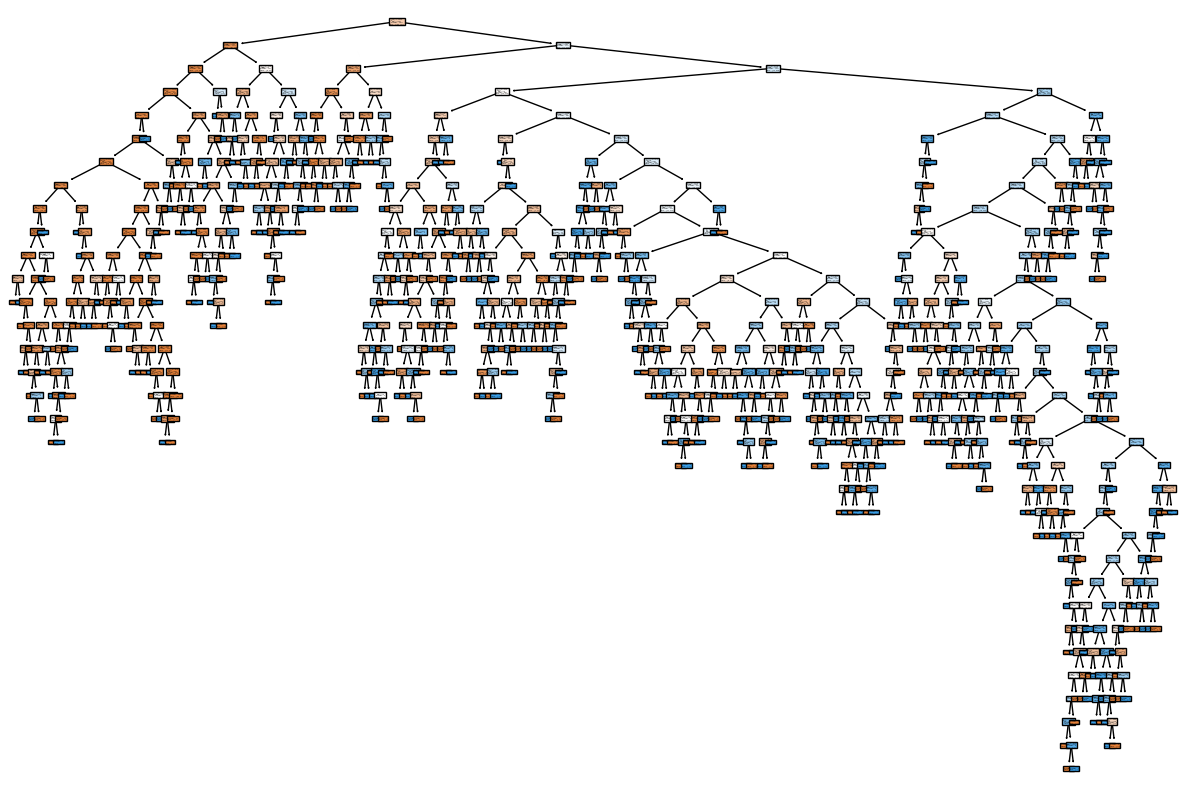

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,10))
plot_tree(model,filled=True, 
          feature_names=x_list)

plt.show()

max_depth = 5인 경우

In [16]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as mt

# 모델생성
model = DecisionTreeClassifier(max_depth=5) 

# 여러 속성값 

# 모델 학습 
model.fit(x_train, y_train)

# 모델검증
# print(model.score(x_train, y_train))
# print(model.score(x_valid, y_valid))

# 모델 예측
y_predict = model.predict(x_valid)

# 성능평가 

accuracy = mt.accuracy_score(y_valid, y_predict)
recall = mt.recall_score(y_valid, y_predict)
precision = mt.precision_score(y_valid, y_predict)
f1_score = mt.f1_score(y_valid, y_predict)
matrix = mt.confusion_matrix(y_valid, y_predict)

print('Train_Accuracy: ', model.score(x_train, y_train),'\n')
print('Accuracy: ', format(accuracy,'.2f'),'\n') # 모델
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

Train_Accuracy:  0.7325994318181818 

Accuracy:  0.69 

Recall:  0.46 

Precision:  0.60 

F1_score:  0.52 

Confusion Matrix: 
 [[633 134]
 [239 202]]


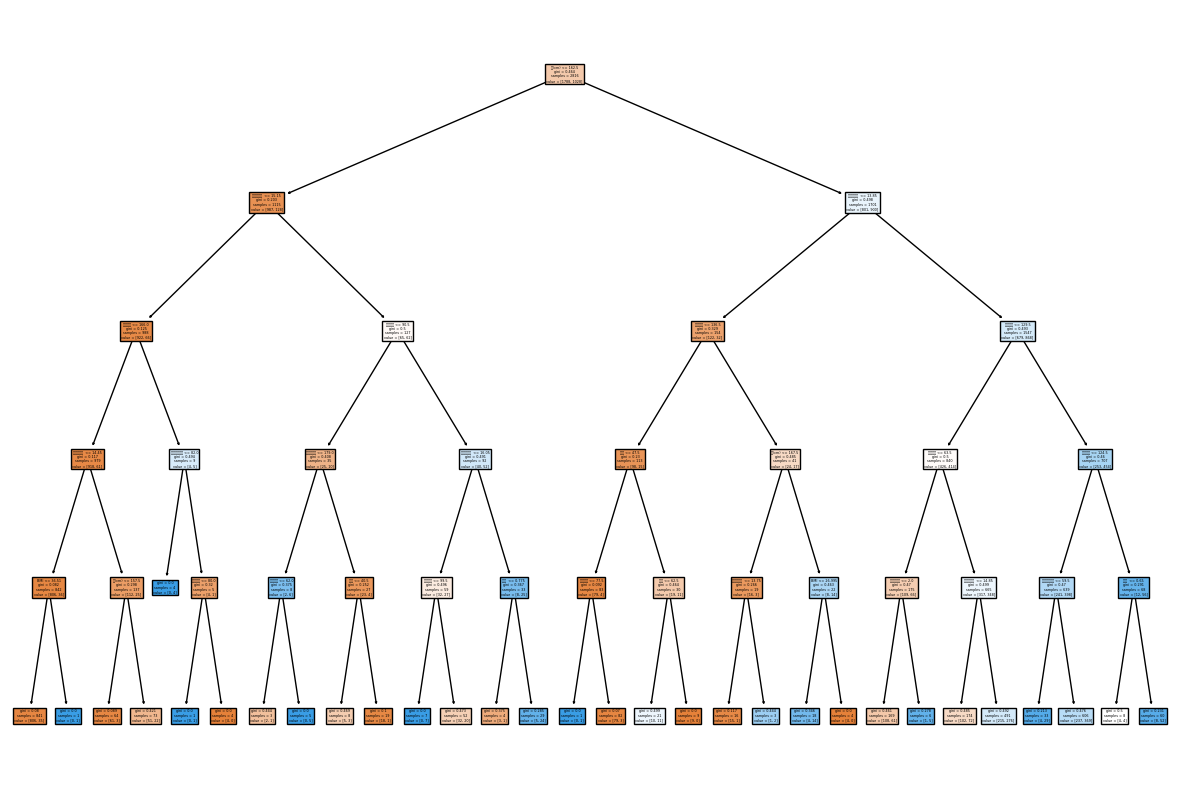

In [47]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(15,10))
plot_tree(model,filled=True, 
          feature_names=x_list)

plt.show()

In [49]:
x_data

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복혈당,혈압,중성지방,혈청크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요단백,간효소비율
2,40,150,45,20.00,1.20,0,71,40,64,0.7,233,65,155.0,14.0,1,1.59
3,30,170,70,24.22,1.20,1,98,50,111,1.2,208,66,119.0,15.4,1,0.75
5,60,165,60,22.04,1.05,0,88,41,95,1.1,193,55,119.0,14.4,1,0.95
6,50,170,70,24.22,0.85,0,86,47,155,0.8,184,51,102.0,16.1,1,1.11
7,45,155,55,22.89,1.20,0,92,43,100,0.7,259,68,171.0,12.6,1,1.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,35,170,75,25.95,1.20,0,87,49,113,0.9,120,43,54.0,14.0,1,0.56
4995,40,170,85,29.41,1.50,0,129,50,132,0.9,211,39,146.0,16.6,1,0.59
4996,30,175,100,32.65,1.35,1,91,50,62,0.8,181,57,112.0,15.6,1,1.10
4997,35,180,90,27.78,0.90,0,96,32,181,1.2,238,46,156.0,17.0,1,0.73


In [50]:
## 키와 체중을 제외하고 BMI만 사용
from sklearn.model_selection import train_test_split

x_data2= df_train.drop(['Unnamed: 0','ID','label', '키(cm)', '몸무게(kg)'], axis=1)
y_data2 = df_train['label']

x_train, x_valid, y_train, y_valid = train_test_split(x_data2, y_data2, test_size = 0.3, stratify=y_data )

In [17]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as mt

# 모델생성
model = DecisionTreeClassifier(max_depth=5) 

# 여러 속성값 

# 모델 학습 
model.fit(x_train, y_train)

# 모델검증
# print(model.score(x_train, y_train))
# print(model.score(x_valid, y_valid))

# 모델 예측
y_predict = model.predict(x_valid)

# 성능평가 

accuracy = mt.accuracy_score(y_valid, y_predict)
recall = mt.recall_score(y_valid, y_predict)
precision = mt.precision_score(y_valid, y_predict)
f1_score = mt.f1_score(y_valid, y_predict)
matrix = mt.confusion_matrix(y_valid, y_predict)

print('Train_Accuracy: ', model.score(x_train, y_train),'\n')
print('Accuracy: ', format(accuracy,'.2f'),'\n') # 모델
print('Recall: ', format(recall,'.2f'),'\n')
print('Precision: ', format(precision,'.2f'),'\n')
print('F1_score: ', format(f1_score,'.2f'),'\n')
print('Confusion Matrix:','\n', matrix)

# 정확도에 큰 변화는 없다..^^ 

Train_Accuracy:  0.7325994318181818 

Accuracy:  0.69 

Recall:  0.46 

Precision:  0.60 

F1_score:  0.52 

Confusion Matrix: 
 [[633 134]
 [239 202]]


### 2. 로지스틱회귀

In [36]:
# 데이터 전처리
from sklearn.model_selection import train_test_split

x_data = df_train.drop(['Unnamed: 0','ID','label'], axis=1)
y_data = df_train['label']

x_train, x_valid, y_train, y_valid = train_test_split(x_data, y_data, test_size = 0.3, stratify=y_data )

In [40]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

lr = LogisticRegression()
lr.fit(x_train, y_train)

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

y_predict = model.predict(x_valid)


coefficient =  [[ 1.73608466e-03 -4.48317354e-02  1.27771889e-01 -3.92607809e-01
  -2.36736367e-03  8.87909408e-02  7.25737349e-03 -4.82777174e-03
   5.10170468e-03  3.84985559e-02 -5.06000753e-03  1.63694403e-04
   1.11273918e-03  5.03464507e-01 -2.30783744e-02 -6.61104592e-02]]
intercept =  [-0.01151972]


In [41]:
# 성능평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=y_valid, y_pred=y_predict))
print('accuracy = ', accuracy_score(y_true=y_valid, y_pred=y_predict))
print('precision = ', precision_score(y_true=y_valid, y_pred=y_predict))
print('recall = ', recall_score(y_true=y_valid, y_pred=y_predict))
print('f1 score = ', f1_score(y_true=y_valid, y_pred=y_predict))

confusion matrix = 
 [[648 119]
 [211 230]]
accuracy =  0.7268211920529801
precision =  0.6590257879656161
recall =  0.5215419501133787
f1 score =  0.5822784810126582


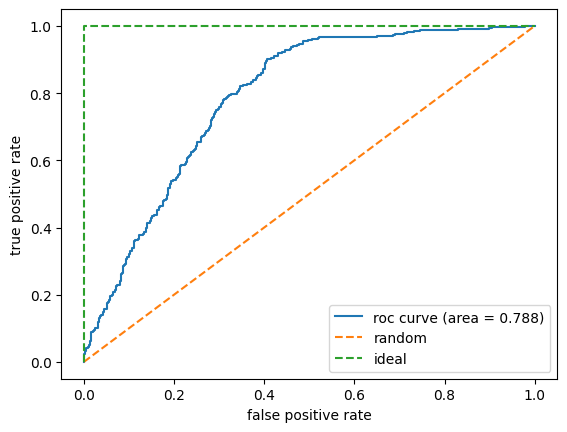

In [42]:
from sklearn.metrics import roc_curve, auc

Y_score = lr.predict_proba(x_valid)[:, 1] # 검증 데이터가 클래스 1에 속하는지 확인
fpr, tpr, thresholds = roc_curve(y_true=y_valid, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

3. 랜덤포레스트


In [43]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier 모델 선언 후 Fitting
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_predict = rfc.predict(x_valid)

In [44]:
# 중요도 살펴보기 
feature_importance = pd.DataFrame(rfc.feature_importances_.reshape((1, -1)), columns=x_train.columns, index=['feature_importance'])
feature_importance

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복혈당,혈압,중성지방,혈청크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요단백,간효소비율
feature_importance,0.049331,0.100446,0.049753,0.050474,0.052349,0.011599,0.067791,0.051686,0.091107,0.052798,0.066693,0.063534,0.067319,0.152051,0.005316,0.067753


In [46]:
# 성능평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=y_valid, y_pred=y_predict))
print('accuracy = ', accuracy_score(y_true=y_valid, y_pred=y_predict))
print('precision = ', precision_score(y_true=y_valid, y_pred=y_predict))
print('recall = ', recall_score(y_true=y_valid, y_pred=y_predict))
print('f1 score = ', f1_score(y_true=y_valid, y_pred=y_predict))

confusion matrix = 
 [[604 163]
 [147 294]]
accuracy =  0.7433774834437086
precision =  0.6433260393873085
recall =  0.6666666666666666
f1 score =  0.6547884187082406


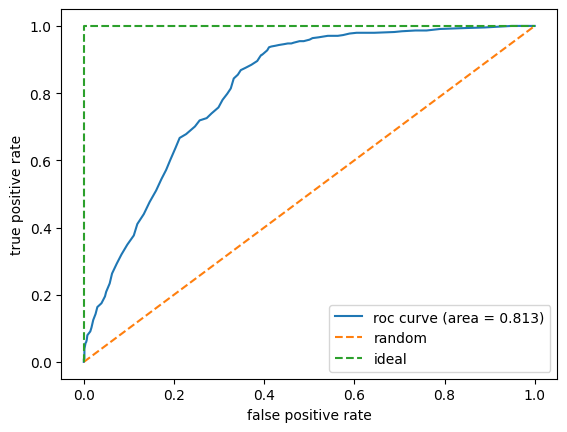

In [47]:
from sklearn.metrics import roc_curve, auc

Y_score = rfc.predict_proba(x_valid)[:, 1] # 검증 데이터가 클래스 1에 속하는지 확인
fpr, tpr, thresholds = roc_curve(y_true=y_valid, y_score=Y_score)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV

params = {
    "n_estimators": [100], 
    "max_depth": [6, 8, 10, 12], 
    "min_samples_leaf": [8, 12, 18], 
    "min_samples_split": [8, 16, 20]
}

# 랜덤 포레스트 객체 생성 후 GridSearchCV
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv=2, n_jobs = -1)

grid_cv.fit(x_train, y_train)

print("최고 예측 정확도:{0:.4f}".format(grid_cv.best_score_))
print("최적 하이퍼 파라미터:\n", grid_cv.best_params_)

최고 예측 정확도:0.7067
최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}


### 4. 베이지안분류

In [53]:
from sklearn.naive_bayes import CategoricalNB

clf = CategoricalNB()
clf.fit(x_train, y_train)

y_predict = rfc.predict(x_valid)


In [54]:
# 성능평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=y_valid, y_pred=y_predict))
print('accuracy = ', accuracy_score(y_true=y_valid, y_pred=y_predict))
print('precision = ', precision_score(y_true=y_valid, y_pred=y_predict))
print('recall = ', recall_score(y_true=y_valid, y_pred=y_predict))
print('f1 score = ', f1_score(y_true=y_valid, y_pred=y_predict))

confusion matrix = 
 [[604 163]
 [147 294]]
accuracy =  0.7433774834437086
precision =  0.6433260393873085
recall =  0.6666666666666666
f1 score =  0.6547884187082406
